In [1]:
%matplotlib inline

In [2]:
# Our standard set of imports for pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from math import sqrt

# some imports to handle HTML requests and parsing the results
from StringIO import StringIO
import requests

mpl.style.use('fivethirtyeight')

In [3]:
# Let's import the pandas library
import pandas as pd

# Let's set up a URL to the file, which in this case is hosted on Github
base_url = 'https://raw.githubusercontent.com/johnjfox/Analytic_Enterprise/master/data/'
score_data = 'judgment/scores.csv'
wine_data  = 'judgment/wines.csv'

# Now let's read the file
scores = pd.read_csv(base_url + score_data)
wines = pd.read_csv(base_url + wine_data)

# Finally, let's print the first few lines
scores.sample(5)

,Judge,Wine,Variety,Rating
38,John Foy,C,White,16.0
52,Jamal Rayyis,M,Red,14.0
61,Jamal Rayyis,D,White,17.5
10,Tyler Colman,K,Red,14.0
1,Tyler Colman,A,White,16.0


In [4]:
wines.sample(5)

,Wine,Type/Vineyard,Year,Location,Variety
8,I,Amalthea Cellars Europa VI Chardonnay,2008,New Jersey,White
6,G,Ventimiglia Chardonnay,2010,New Jersey,White
15,P,Tomasello Winery Oak Reserve Cabernet Sauvignon,2007,New Jersey,Red
12,M,Silver Decoy Winery Cabernet Franc,2008,New Jersey,Red
7,H,Domaine Jean Latour-Labille Meursault-Charmes ...,2008,France,White


### What's Our Plan?

### Where Do We Start?

### Let's Start With Some Wrangling

In [5]:
df = pd.merge(scores, wines, how='inner', on='Wine')
df.sample(5)

,Judge,Wine,Variety_x,Rating,Type/Vineyard,Year,Location,Variety_y
45,Jean-Marie Cardebat,M,Red,12,Silver Decoy Winery Cabernet Franc,2008,New Jersey,Red
51,Daniele Meulders,M,Red,11,Silver Decoy Winery Cabernet Franc,2008,New Jersey,Red
80,Francis Schott,E,White,15,Silver Decoy Winery Black Feather Chardonnay,2010,New Jersey,White
16,Jamal Rayyis,K,Red,15,Chateau Montrose,2004,France,Red
157,Robert Hodgson,S,Red,8,Four JGs Vineyard Cabernet Franc,2008,New Jersey,Red


### Let's Do Some Quick Analyses

In [6]:
pivot = pd.pivot_table(df, index='Location', columns = 'Variety_x', values = 'Rating', aggfunc = 'mean')
pivot

Variety_x,Red,White
Location,,
France,14.972222,14.041667
New Jersey,13.712963,14.314815


In [7]:
df_select = df[['Wine', 'Variety_x', 'Location','Rating']]
df_select = df_select.rename(columns={'Variety_x': 'Variety'})
df_select.sample(5)

,Wine,Variety,Location,Rating
71,N,Red,New Jersey,15
68,N,Red,New Jersey,16
62,D,White,France,18
50,M,Red,New Jersey,17
143,R,Red,New Jersey,16


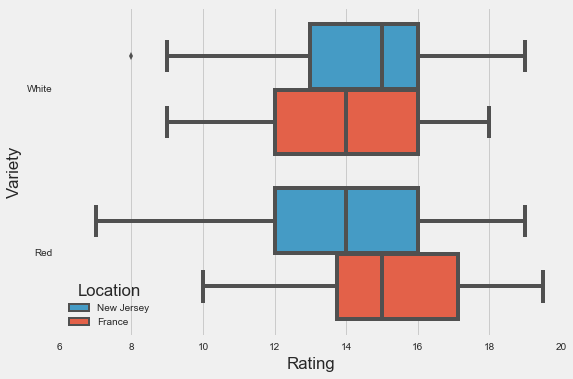

In [8]:
sns.boxplot(data=df_select, x='Rating', y='Variety', hue='Location', orient='h')

## Hypothesis Tests

In [9]:
# I can do Boolean indexing with multiple criteria, but look at what I need to do
# I need to use the & to combine the tests (| would be an OR, ~ is a NOT)
# I also need the parentheses to force the order of operations
french_white = df_select[(df_select.Location=='France') & (df_select.Variety =='White')]
french_red   = df_select[(df_select.Location=='France') & (df_select.Variety =='Red')]

nj_white = df_select[(df_select.Location=='New Jersey') & (df_select.Variety =='White')]
nj_red   = df_select[(df_select.Location=='New Jersey') & (df_select.Variety =='Red')]

In [10]:
test_stat, pvalue = stats.ttest_ind(french_white.Rating, nj_white.Rating, equal_var=False)

print 'TEST_STAT', test_stat
print 'PVALUE: ', pvalue

TEST_STAT -0.506926443404
PVALUE:  0.613586017009


In [11]:
test_stat, pvalue = stats.ttest_ind(french_red.Rating, nj_red.Rating, equal_var=False)

print 'TEST_STAT', test_stat
print 'PVALUE: ', pvalue

TEST_STAT 2.1849464097
PVALUE:  0.0319606007853
